In [5]:
import ctypes
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import utils as benchUtils


In [6]:
maxThreads = 12

binary = ctypes.CDLL( "build/sharedLibrary.so" )
binary.benchTAS.restype = benchUtils.benchData
binary.benchLockOMP.restype = benchUtils.benchData
binary.benchCriticalOMP.restype = benchUtils.benchData


threadNum = [i for i in range(2, maxThreads)]
bmListTAS = {threads: [binary.benchTAS(threads, 1000, 1) for _ in range(1000)] for threads in threadNum}
bmListLockOMP = {threads: [binary.benchLockOMP(threads, 1000, 1) for _ in range(1000)] for threads in threadNum}
bmListCriticalOMP = {threads: [binary.benchCriticalOMP(threads, 1000, 1) for _ in range(1000)] for threads in threadNum}

df_TAS = benchUtils.dataframeBuilder(bmListTAS)
df_LockOMP = benchUtils.dataframeBuilder(bmListLockOMP)
df_CriticalOMP = benchUtils.dataframeBuilder(bmListCriticalOMP)


TAS Lock Summary: 1000 Lock acquisiton requests on 2 threads took: 0.000876
  with 0 failAcq,  1001 successAcq, 41.100000 % fairness dev.,  1142433.234727  acq/s throughput
TAS Lock Summary: 1000 Lock acquisiton requests on 2 threads took: 0.001776
  with 0 failAcq,  1000 successAcq, 100.000000 % fairness dev.,  563063.061601  acq/s throughput
TAS Lock Summary: 1000 Lock acquisiton requests on 2 threads took: 0.000071
  with 0 failAcq,  1001 successAcq, 72.699997 % fairness dev.,  14118477.888576  acq/s throughput
TAS Lock Summary: 1000 Lock acquisiton requests on 2 threads took: 0.002567
  with 0 failAcq,  1000 successAcq, 100.000000 % fairness dev.,  389529.447712  acq/s throughput
TAS Lock Summary: 1000 Lock acquisiton requests on 2 threads took: 0.002337
  with 0 failAcq,  1001 successAcq, 71.900002 % fairness dev.,  428308.587778  acq/s throughput
TAS Lock Summary: 1000 Lock acquisiton requests on 2 threads took: 0.002029
  with 0 failAcq,  1001 successAcq, 19.300001 % fairness de

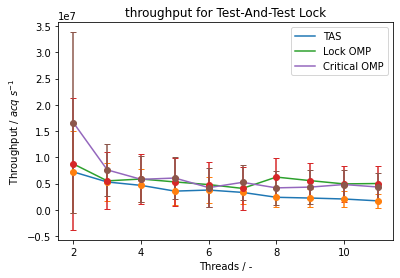

In [7]:
plt.plot(df_TAS["threads"], df_TAS["meanTP"], label = "TAS")
plt.errorbar(df_TAS["threads"], df_TAS["meanTP"], df_TAS["stddTP"], linestyle='None', fmt='o', capsize=3)

plt.plot(df_LockOMP["threads"], df_LockOMP["meanTP"], label = "Lock OMP")
plt.errorbar(df_LockOMP["threads"], df_LockOMP["meanTP"], df_LockOMP["stddTP"], linestyle='None', fmt='o', capsize=3)

plt.plot(df_CriticalOMP["threads"], df_CriticalOMP["meanTP"], label = "Critical OMP")
plt.errorbar(df_CriticalOMP["threads"], df_CriticalOMP["meanTP"], df_CriticalOMP["stddTP"], linestyle='None', fmt='o', capsize=3)


plt.title("throughput for Test-And-Test Lock")
plt.xlabel("Threads / -")
plt.ylabel("Throughput / $acq$ $s^{-1}$")
plt.legend()